<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 23 **
** ┗ Income prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉SESSION 1 -「Confirmation of Gender Composition」
* 🥈SESSION 2 -「Establishment and Verification of hypotheses」
* 🥇SESSION 3 -「ML Utilization Income Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/23_Income Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/23_Income Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🤑 (HRD/HRM)

``
Company A will launch a new company this time and establish a new salary system.Because of the entry into the new business, large -scale recruitment
It is going to proceed.Therefore, in order to establish a benefit band by job level, the model that predicts the salary using data on the profile information and assets of the applicants.
I would like to create and use it as a base data for the benefit band settings.

``


> ** Looking at the data **

* Income related data
* Data specification ⬇

| AGE | WorkClass | Fnlwgt | Education | Education.num | Marital.status |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Age | occupation group | Demographic characteristics statistics (similar to similar classes) | Education level | Education level division | Marriage status |
| OCCUPATION | Relationship | RACE | Sex | Capital.gain | Capital.loss |
| Job | Family Relations | Race | Gender | Asset profit | Asset loss |
| Hours.per.week | Native.country | INCOME
| Main Museum | Nationality | Income |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter23_income.csv')
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Loss of salary due to entering new businesses
``

> ** Expected effect **

``
▶ Preparation of recruitment base with new BAND establishment
``

> ** Solution **

``
▶ Establishment of BAND BASE system for applicants for use of income prediction model
▶ Session 1 🥉
-Data pretreatment and default data check
▶ Session 2 🥈
-Data search to verify the hypothesis after the hypothesis
▶ Session 3 🥇
-Saling prediction using ML algorithm
``

> ** Performance measurement **

``
▶ Utilization of proper employment budget
``

> ** Public application **

``
▶ Utilization of new applicants' profile information, salary band prediction and negotiation data utilization
``

> ** Main code preview **

``
▶ Session 1 → np.where, groupby.agg ()
▶ Session 2 → np.where, groupby.agg (), SNS.LINEPLOT
▶ Session 3 → Binarizer, RandomForestClassifier (), Labelencoder (), ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Confirmation of gender composition **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 32,561 ROW, 15 cola
print('df', df.shape)

df (32561, 15)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# ▶?Data processing
df.replace('?', 'none', inplace=True)
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


###, demographic characteristics analysis
---


In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# ▶ Target Data Check
df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [ ]:
7841 / (24720 + 7841)

0.2408095574460244

In [ ]:
# ▶> 50K is high income 1, <= 50K low -income person 0
import numpy as np
df['income'] = np.where(df['income'] =='>50K', 1, 0)
df['income'].value_counts()

,count
income,
0,24720
1,7841


In [ ]:
# ▶ Customer profile (gender / age analysis)
# ▶ Sectionization
import numpy as np
df['age_gp'] = np.where (df['age'] <= 30, '30 이하',
                           np.where(df['age'] <= 40, '30-40대', '40대 이상'))

df[['age','age_gp']]

,age,age_gp
0,90,40대 이상
1,82,40대 이상
2,66,40대 이상
3,54,40대 이상
4,41,40대 이상
...,...,...
32556,22,30 이하
32557,27,30 이하
32558,40,30-40대
32559,58,40대 이상


In [ ]:
# ▶ High income ratio according to age
df_gp = df.groupby('age_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
age_gp,,,
30 이하,10572,682,6.5
30-40대,8546,2406,28.2
40대 이상,13443,4753,35.4


In [ ]:
# ▶ Gender high income ratio
df_gp = df.groupby('sex')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
sex,,,
Female,10771,1179,10.9
Male,21790,6662,30.6


In [ ]:
# ▶ High -income ratio according to family relations
df_gp = df.groupby('relationship')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
relationship,,,
Husband,13193,5918,44.9
Not-in-family,8305,856,10.3
Other-relative,981,37,3.8
Own-child,5068,67,1.3
Unmarried,3446,218,6.3
Wife,1568,745,47.5


In [ ]:
# ▶ High income ratio of marriage type
df_gp = df.groupby('marital.status')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'], ascending = False)

,count,sum,ratio
marital.status,,,
Married-civ-spouse,14976,6692,44.7
Married-AF-spouse,23,10,43.5
Divorced,4443,463,10.4
Widowed,993,85,8.6
Married-spouse-absent,418,34,8.1
Separated,1025,66,6.4
Never-married,10683,491,4.6


## ** 🥈Session 2 **
** ┗ Hypothesis establishment and verification **
---

* The perspective of looking at the essence of the problem I should think of from a variety of perspectives
* Focus on understanding the nature of the problem, not focusing on phenomena
* Tasks to quickly establish hypotheses from various perspectives and verify them with data


* ex) Sales fell to MZ generation.
-Did the purchase rate of MZ customers drop?
-Did you increase the leak of competitors?
-Did you change the preferred product of the MZ generation?
-Did you increase online purchases due to the Corona issue?

→ 🔔 ** You must define hypotheses from a variety of perspectives, develop data verification and establish a strategy.


### · Hypothesis (1)
---

* The high income ratio will vary depending on the value of asset income + asset loss.
* If the asset net value is high, it can be said that it is good for asset management (financial).


In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_gp
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,0,40대 이상
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,40대 이상
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,0,40대 이상
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40대 이상
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40대 이상


In [ ]:
# ▶ Gross asset SUM COL generation
df['capital_sum'] = df['capital.gain'] - df['capital.loss']
df[['capital.gain', 'capital.loss', 'capital_sum']].head(5)

,capital.gain,capital.loss,capital_sum
0,0,4356,-4356
1,0,4356,-4356
2,0,4356,-4356
3,0,3900,-3900
4,0,3900,-3900


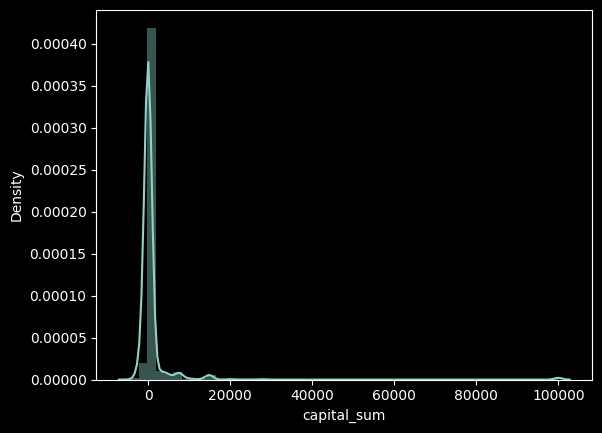

In [ ]:
# ▶ CAPITAL_SUM distribution confirmation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['capital_sum']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['capital_sum_gp'] = np.where (df['capital_sum'] <= 0, '0 이하',
                           np.where(df['capital_sum'] <= 10000, '0-10,000 이하', '10,000 초과'))

df[['capital_sum','capital_sum_gp']].head(5)

,capital_sum,capital_sum_gp
0,-4356,0 이하
1,-4356,0 이하
2,-4356,0 이하
3,-3900,0 이하
4,-3900,0 이하


In [ ]:
# ▶ High income ratio, critical variable
df_gp = df.groupby('capital_sum_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
capital_sum_gp,,,
0 이하,29849,6164,20.7
"0-10,000 이하",1942,921,47.4
"10,000 초과",770,756,98.2


### · Hypothesis (2)
---

* Even if you are young, high -educated will be high income.


In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_gp,capital_sum,capital_sum_gp
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,40대 이상,-4356,0 이하
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하


In [ ]:
# ▶ High income ratio according to age
df_gp = df.groupby('age_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
age_gp,,,
30 이하,10572,682,6.5
30-40대,8546,2406,28.2
40대 이상,13443,4753,35.4


In [ ]:
# ▶ High income ratio according to age and high -educated level
# ▶ It is difficult to grasp at a glance
df_gp = df.groupby(['age_gp', 'education.num'])['income'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

count   sum  ratio
age_gp education.num                    
30 이하  1                 12     0    0.0
       2                 30     0    0.0
       3                 92     1    1.1
       4                114     2    1.8
       5                158     2    1.3
       6                391     1    0.3
       7                644    12    1.9
       8                235     4    1.7
       9               3276   135    4.1
       10              3065   131    4.3
       11               389    42   10.8
       12               325    29    8.9
       13              1559   254   16.3
       14               199    47   23.6
       15                61    15   24.6
       16                22     7   31.8
30-40대 1                 13     0    0.0
       2                 35     0    0.0
       3                 59     4    6.8
       4                 95     7    7.4
       5                116     7    6.0
       6                175    13    7.4
       7                206    12    5.8
       8                 82     9   11.0
       9               2882   490   17.0
       10              1702   401   23.6
       11               462   130   28.1
       12               369   107   29.0
       13              1614   762   47.2
       14               463   258   55.7
       15               171   137   80.1
       16               102    69   67.6
40대 이상 1                 26     0    0.0
       2                103     6    5.8
       3                182    11    6.0
       4                437    31    7.1
       5                240    18    7.5
       6                367    48   13.1
       7                325    36   11.1
       8                116    20   17.2
       9               4343  1050   24.2
       10              2524   855   33.9
       11               531   189   35.6
       12               373   129   34.6
       13              2182  1205   55.2
       14              1061   654   61.6
       15               344   271   78.8
       16               289   230   79.6

In [ ]:
df_gp = pd.DataFrame(df_gp.reset_index())
df_gp.head(5)

,age_gp,education.num,count,sum,ratio
0,30 이하,1,12,0,0.0
1,30 이하,2,30,0,0.0
2,30 이하,3,92,1,1.1
3,30 이하,4,114,2,1.8
4,30 이하,5,158,2,1.3


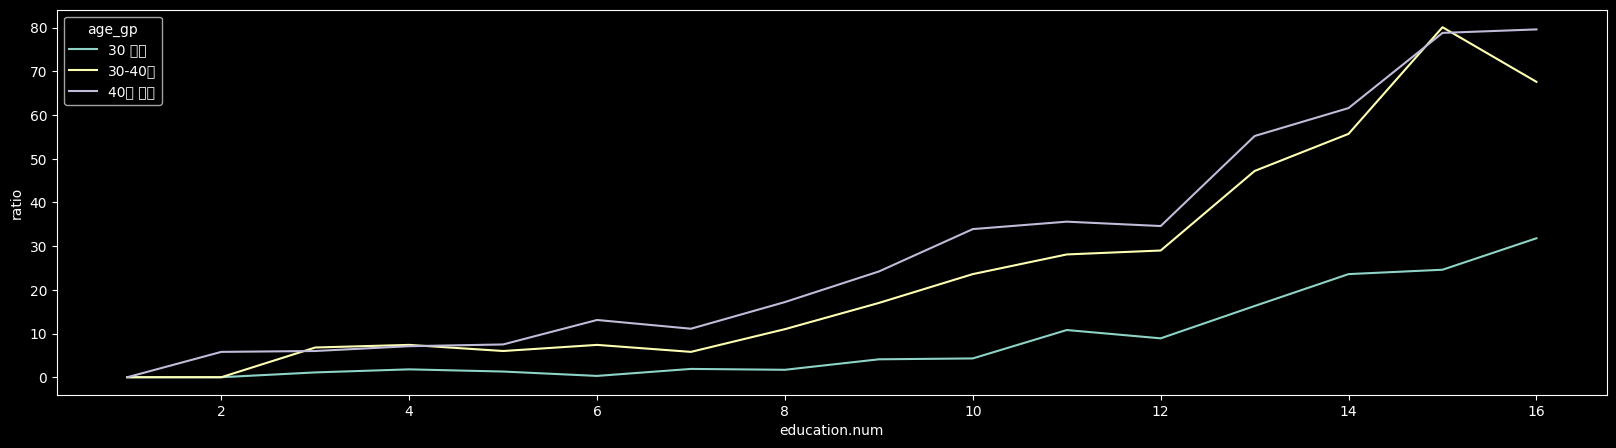

In [ ]:
# ▶ You can see that the age of age is high, but GAPs are reduced to high educational power in the 30-40s and the ages of the 40s.
sns.lineplot(x='education.num', y='ratio', hue='age_gp', data = df_gp);
plt.gcf().set_size_inches(20 ,5)

### · Hypothesis (3)
---

* The percentage of high -income income will vary depending on demographic characteristics.


In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_gp,capital_sum,capital_sum_gp
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,40대 이상,-4356,0 이하
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하


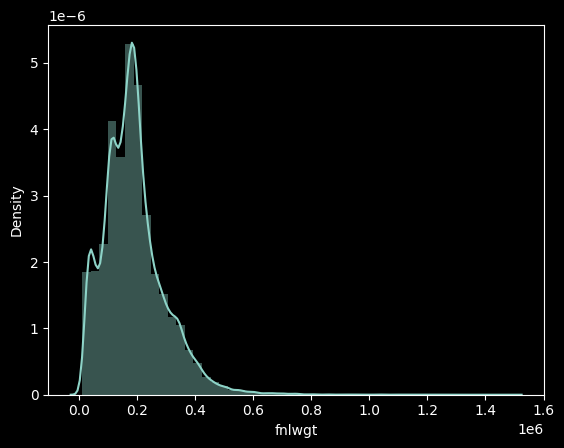

In [ ]:
# ▶ FNLWGT (demographic characteristics) distribution confirmation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['fnlwgt']);

In [ ]:
0.1*10**6

100000.0

In [ ]:
# ▶ Sectionization
import numpy as np
df['fnlwgt_gp'] = np.where (df['fnlwgt'] <= 0.1*10**6, '100,000 이하',
                           np.where(df['fnlwgt'] <= 0.3*10**6, '100,000-30,000 이하', '30,000 초과'))

df[['fnlwgt','fnlwgt_gp']].head(5)

,fnlwgt,fnlwgt_gp
0,77053,"100,000 이하"
1,132870,"100,000-30,000 이하"
2,186061,"100,000-30,000 이하"
3,140359,"100,000-30,000 이하"
4,264663,"100,000-30,000 이하"


In [ ]:
# ▶ It does not show a tendency to increase clearly as the number increases.
df_gp = df.groupby(['fnlwgt_gp'])['income'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
fnlwgt_gp,,,
"100,000 이하",5670,1288,22.7
"100,000-30,000 이하",22479,5505,24.5
"30,000 초과",4412,1048,23.8


## ** 🥇Session 3 **
** ┗ ML utilization income prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'age_gp', 'capital_sum_gp', 'fnlwgt_gp']
numeric_list : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income', 'capital_sum']


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['age_gp', 'capital_sum_gp', 'fnlwgt_gp', 'education.num', 'income'], axis=1)
Y=df['income']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(22792, 14)
(22792,)
(9769, 14)
(9769,)


In [ ]:
# ▶ Data EDA Use Variable Preliminary Removal
categoical_list.remove('age_gp')
categoical_list.remove('capital_sum_gp')
categoical_list.remove('fnlwgt_gp')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

workclass
education
marital.status
occupation
relationship
race
sex
native.country


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
from sklearn.metrics import classification_report
# ▶ Learning
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     17303
           1       0.94      0.32      0.48      5489

    accuracy                           0.83     22792
   macro avg       0.88      0.66      0.69     22792
weighted avg       0.85      0.83      0.80     22792

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      7417
           1       0.93      0.30      0.45      2352

    accuracy                           0.83      9769
   macro avg       0.87      0.64      0.67      9769
weighted avg       0.84      0.83      0.79      9769



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0,9023
1,746


In [ ]:
from sklearn.preprocessing import Binarizer

# ▶ If the threshold increases, the precision value increases because it will predict the real correct answer data (※ Number of predicted numbers)
# ▶ If the threshold decreases, the recall value increases because it predicts more of the correct answer that is a little more likely (※ Increased number of predicted numbers)
Input_threshold = 0.4

pred_proba_test = rfc.predict_proba(x_test)[:,1].reshape(-1,1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

# ▶ Confirmation of performance evaluation
print(classification_report(y_test, custom_predict))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7417
           1       0.69      0.58      0.63      2352

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [ ]:
pd.Series(custom_predict.reshape(-1)).value_counts()

,count
0.0,7797
1.0,1972


In [ ]:
# # ▶ It is preventing overdose to reduce performance as much as possible to the train and test set.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9001445752174859
roc_score_test : 0.8910558021240045


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

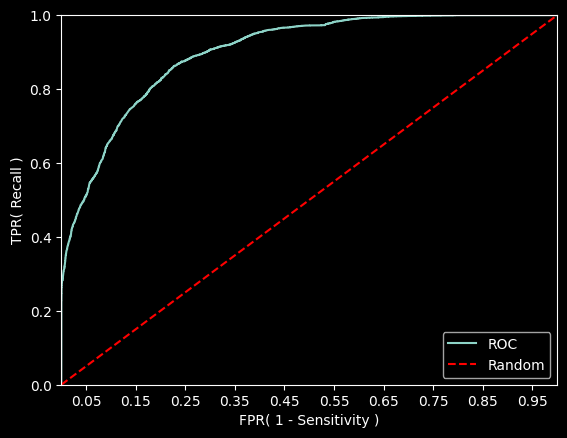

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

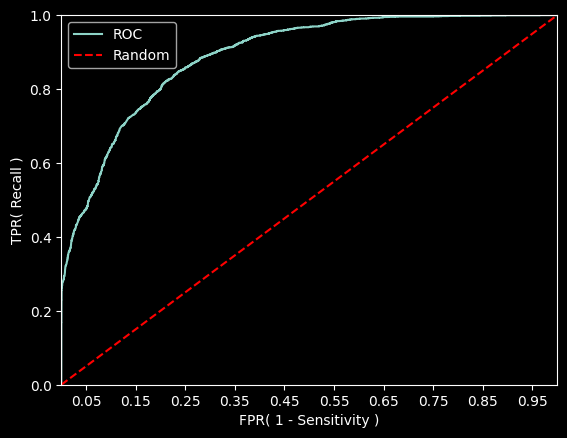

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


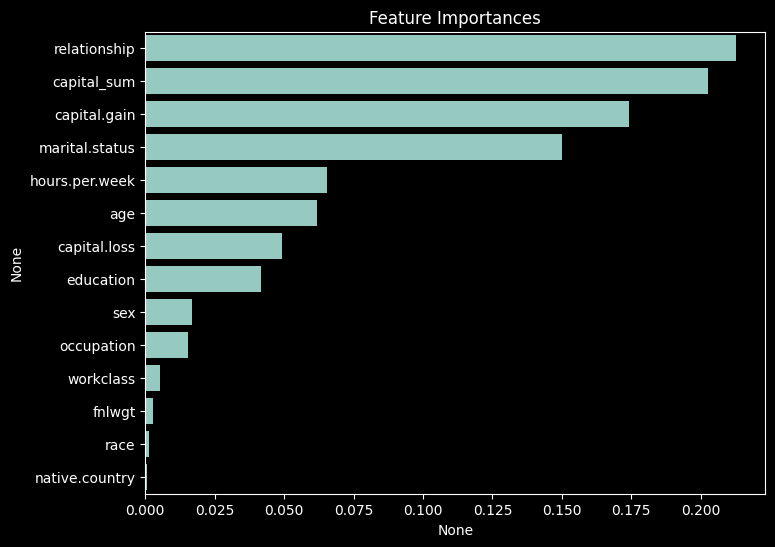

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.rc('xtick', labelsize=5)
plt.show()

In [ ]:
# 1st priority candidate search
# ▶ High -income ratio according to family relations
df_gp = df.groupby('relationship')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
relationship,,,
Husband,13193,5918,44.9
Not-in-family,8305,856,10.3
Other-relative,981,37,3.8
Own-child,5068,67,1.3
Unmarried,3446,218,6.3
Wife,1568,745,47.5


In [ ]:
# ▶ Capital_sum
df_gp = df.groupby('capital_sum_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
capital_sum_gp,,,
0 이하,29849,6164,20.7
"0-10,000 이하",1942,921,47.4
"10,000 초과",770,756,98.2



### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)

In [ ]:
# You must attach the last prediction value when you operate the business!
x_test.head(5)

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,capital_sum
29101,44,3,163331,15,6,0,4,4,0,0,0,32,38,0
7763,27,3,169631,11,4,5,3,4,0,0,0,40,38,0
6149,34,3,221324,11,4,6,4,2,0,0,0,40,38,0
14201,56,1,238582,15,2,2,0,4,1,0,0,41,38,0
8219,26,3,171114,8,5,0,4,4,0,0,0,35,38,0


In [ ]:
custom_predict.reshape(-1)

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
x_test['Y'] = custom_predict.reshape(-1)
x_test[x_test['Y'] == 1.0]

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,capital_sum,Y
25539,40,3,137142,11,2,11,0,4,1,0,0,40,38,0,1.0
1388,48,3,202467,9,2,9,0,4,1,0,1485,40,38,-1485,1.0
351,49,3,192776,12,2,3,0,4,1,0,1977,45,38,-1977,1.0
15198,51,3,160724,10,2,9,0,1,1,0,0,99,34,0,1.0
15103,31,3,181091,11,2,2,0,4,1,0,0,50,38,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,34,1,43959,11,2,7,0,4,1,0,0,50,38,0,1.0
24857,56,3,204816,11,2,11,0,4,1,0,0,55,38,0,1.0
1761,83,4,240150,0,2,4,0,4,1,20051,0,50,38,20051,1.0
1838,37,3,148015,9,2,9,5,2,0,15024,0,40,38,15024,1.0
